In [1]:
from collections import defaultdict, namedtuple
P = namedtuple("P", ["x", "y"])

ex="""..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..###..######.###...####..#..#####..##..#.#####...##.#.#..#.##..#.#......#.###.######.###.####...#.##.##..#..#..#####.....#.#....###..#.##......#.....#..#..#..##..#...##.######.####.####.#.#...#.......#..#.#.#...####.##.#......#..#...##.#.##..#...##.#.##..###.#......#.#.......#.#.#.####.###.##...#.....####.#..#..#.##.#....##..#.####....##...##..#...#......#.#.......#.......##..####..#...#.#.#...##..#.#..###..#####........#..####......#..#

#..#.
#....
##..#
..#..
..###
"""


In [2]:
def parse(inp:str):
    alg, img = inp.strip().split('\n\n')
    alg = [1 if a=='#' else 0 for a in alg.strip()]
    img = [[1 if d=='#' else 0 for d in l.strip()]for l in img.strip().split('\n')]
    default = 0
    img_dict = defaultdict(lambda: default)
    for i, l in enumerate(img):
        for j, p in enumerate(l):
            if p == 1:
                img_dict[P(i,j)] = 1
    return alg, img_dict, default

alg, img, default = parse(ex)

In [3]:
def reduce(img:defaultdict[P,int], default:int):
    res = defaultdict(lambda: default)
    for p,v in img.items():
        if v != default:
            res[p] = v
    return res

def to_num(p: P, img:defaultdict[P, int]):
    res = '0b'
    for dx in range(-1, 2):
        for dy in range(-1,2):
            res += str(img[P(p.x+dx, p.y+dy)])
    return int(res, 2)

def new_val(p: P, img:defaultdict[P,int], alg:list[int]):
    v = to_num(p, img)
    return alg[v]

def bounds(img:defaultdict[P, int]):
    x_min, x_max = float("inf"), float("-inf")
    y_min, y_max = float("inf"), float("-inf")
    for p in img:
        if p.x < x_min:
            x_min = p.x
        if p.x > x_max:
            x_max = p.x
        if p.y < y_min:
            y_min = p.y
        if p.y > y_max:
            y_max = p.y
    return P(x_min, y_min), P(x_max, y_max)

In [4]:
def flip_default(img:defaultdict[P,int], default: int):
    return reduce(img, 1-default), 1-default


In [5]:
def enhance(img:defaultdict[P,int], alg:list[int], default: int) -> defaultdict[P,int]:
    res = defaultdict(lambda: default)
    low, high = bounds(img)
    for x in range(low.x-2, high.x+3):
        for y in range(low.y-2, high.y+3):
            p = P(x,y)
            res[p] = new_val(p, img, alg)
    if alg[0] == 1:
        res, default = flip_default(res, default)
    return reduce(res, default), default

In [6]:
def repeat_enhance(inp, n):
    alg, img, default = parse(inp)
    for _ in range(n):
        img, default = enhance(img, alg, default)
    return len(img), img

l, _ = repeat_enhance(ex, 2)
l

35

In [7]:
import numpy as np
from matplotlib.pyplot import imshow
def show(img:defaultdict[P,int]):
    low, high = bounds(img)
    res = np.zeros((high.x-low.x+1, high.y-low.y+1))
    for p in img:
        res[p.x-low.x,p.y-low.y]=1
    imshow(res)


In [8]:
with open("data/20.txt") as f:
    pzl = f.read()
l,_ = repeat_enhance(pzl, 2)
l


5437

In [9]:
l, _ = repeat_enhance(ex, 50)
l

3351

In [12]:
l, img = repeat_enhance(pzl, 50)
l

19340

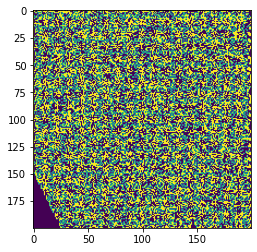

In [11]:
show(img)